## Previsão de Lucros 

Nesse trabalho vamos realizar a previsão das vendas de sorvete de uma determinada loja. Será observado o lucro dependendo da temperatura na região onde a loja está estabelecida.

**Importação das bibliotecas**

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.12.0'

**Importação da base de dados**

In [4]:
# Leitura do arquivo csv
sales_df = pd.read_csv('SalesData.csv')

In [5]:
# Visualização de todos os registros
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [6]:
# Visualização dos 5 primeiros registros
sales_df.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [7]:
# Visualização dos 10 últimos registros
sales_df.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352519
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [8]:
# Visualização de informações da base de dados
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [9]:
# Descrição da base de dados
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


**Visualização da base de dados**

<Axes: xlabel='Temperature', ylabel='Revenue'>

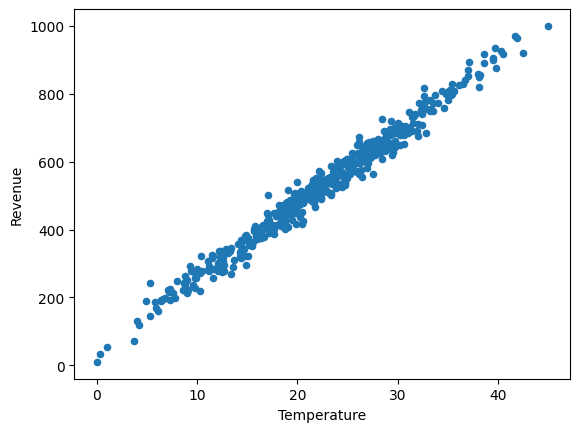

In [10]:
# Scatter plot do Seborn
sales_df.plot.scatter(x="Temperature", y="Revenue")

**Criação das variáveis da base de dados**

In [11]:
# Criação das variáveis X_train e y_train
X_train = sales_df['Temperature']
y_train = sales_df['Revenue']

In [12]:
# Formato da variável X_train
X_train.shape

(500,)

In [13]:
# Formato da variável y_train
y_train.shape

(500,)

**Criação e construção do modelo**

In [14]:
# Construção do modelo sequencial
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 10, input_shape = [1]))
model.add(tf.keras.layers. Dense(units = 1))

In [15]:
# Sumário do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compilar o modelo
model.compile(optimizer= tf.keras.optimizers.Adam(0.01), loss = 'mean_squared_error')


In [17]:
# Treinamento
epochs_hist = model.fit(X_train, y_train, epochs = 1000)

Epoch 1/1000
16/16 [==============================] - 5s 3ms/step - loss: 282061.9688
Epoch 2/1000
16/16 [==============================] - 0s 4ms/step - loss: 251748.0938
Epoch 3/1000
16/16 [==============================] - 0s 3ms/step - loss: 210203.8750
Epoch 4/1000
16/16 [==============================] - 0s 3ms/step - loss: 156887.9062
Epoch 5/1000
16/16 [==============================] - 0s 3ms/step - loss: 99621.3906
Epoch 6/1000
16/16 [==============================] - 0s 3ms/step - loss: 50275.6602
Epoch 7/1000
16/16 [==============================] - 0s 3ms/step - loss: 17663.4180
Epoch 8/1000
16/16 [==============================] - 0s 4ms/step - loss: 3963.7329
Epoch 9/1000
16/16 [==============================] - 0s 3ms/step - loss: 880.5355
Epoch 10/1000
16/16 [==============================] - 0s 3ms/step - loss: 723.6291
Epoch 11/1000
16/16 [==============================] - 0s 3ms/step - loss: 723.0826
Epoch 12/1000
16/16 [==============================] - 0s 3ms/step

**Avaliação do modelo**

In [25]:
# Visualização do dicionário com os resultados
epochs_hist.history.keys()

dict_keys(['loss'])

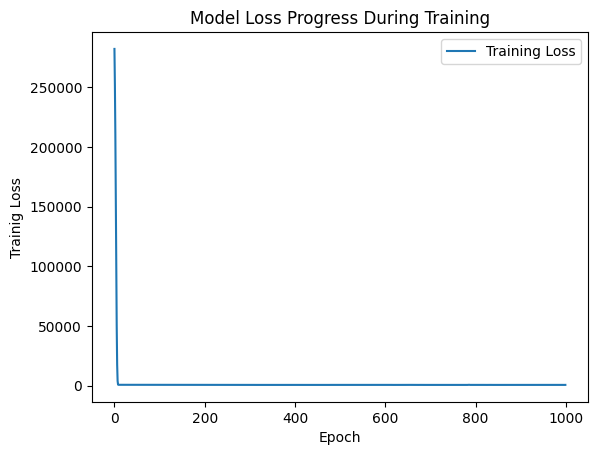

In [26]:
# Gráfico com os resultados da loss function
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Trainig Loss')
plt.legend(['Training Loss'])

In [27]:
# Visualização dos pesos
model.get_weights()

[array([[-1.7353302,  0.2980155,  1.3090054, -1.7030588, -1.351647 ,
          1.7459487,  1.7002339,  1.6758062,  1.3397744,  1.5975221]],
       dtype=float32),
 array([-2.4866416,  2.157316 ,  3.115264 , -2.892559 , -3.497266 ,
         3.3140118,  3.380327 ,  3.004839 ,  3.2169566,  3.4107988],
       dtype=float32),
 array([[-1.9220113 ],
        [ 0.31857032],
        [ 1.6999238 ],
        [-1.5221608 ],
        [-1.2051162 ],
        [ 1.2557142 ],
        [ 1.3456955 ],
        [ 1.477277  ],
        [ 1.6417006 ],
        [ 1.3949008 ]], dtype=float32),
 array([1.9294091], dtype=float32)]

In [45]:
# Previsões com o modelo treinado, com a temperatura de 5 graus

temp = 5
revenue = model.predict([temp])
revenue

1/1 [==============================] - 0s 52ms/step


array([[150.80075]], dtype=float32)

16/16 [==============================] - 0s 2ms/step


Text(0, 0.5, 'Revenue')

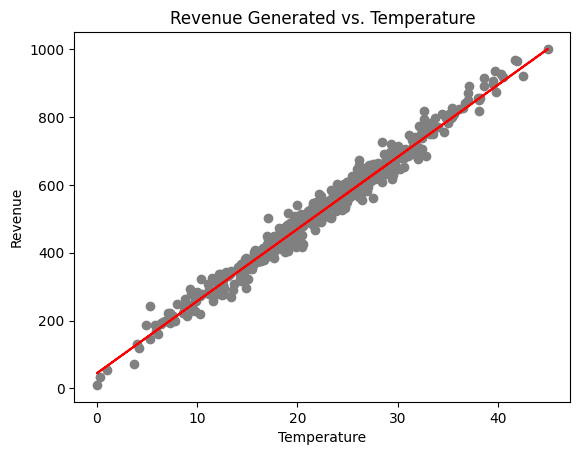

In [31]:
# Gráfico com a reta da regressão linear
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.title('Revenue Generated vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Revenue')

**Confirmar os resultados usando sklearn**

In [32]:
# Usar o sklearn para obter os mesmos resultados
X_train.shape

(500,)

In [34]:
X_train = X_train.values.reshape(-1,1)

In [35]:
X_train.shape

(500, 1)

In [33]:
y_train.shape

(500,)

In [36]:
y_train = y_train.values.reshape(-1,1)

In [37]:
y_train.shape

(500, 1)

In [38]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [39]:
regressor.coef_

array([[21.44362551]])

In [40]:
regressor.intercept_

array([44.83126709])

Text(0, 0.5, 'Revenue')

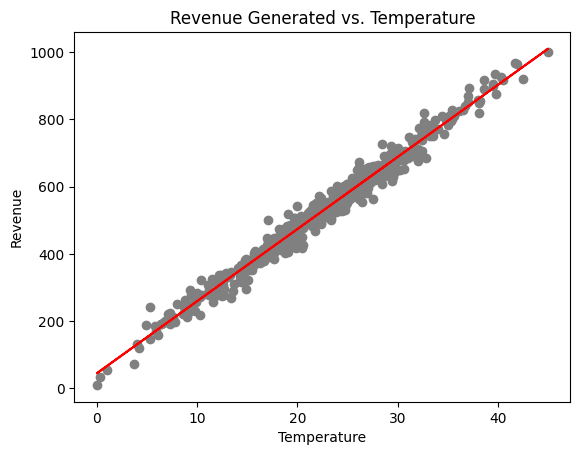

In [41]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Revenue Generated vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Revenue')

In [44]:
temp = 5
revenue = regressor.predict([[temp]])
revenue

array([[152.04939464]])